## Exploratory analysis

### Import libraries

In [15]:
# import dependencies
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from steam import Steam
from dotenv import load_dotenv
import os

### Load data and Steam API key

In [32]:
# Get the Steam Web API key
load_dotenv('../.env')
KEY = os.getenv('STEAM_API_KEY')
steam = Steam(KEY)

# Load the JSON file
with open('../data/interim/user_games_filtered.json', 'r') as file:
    data = json.load(file)

# Extract the necessary information (e.g., game IDs and total hours played) from the data
game_ids = []
playtime = []
game_names = []
for user in data:
    for game in data[user]:
        game_id = game['game_id']
        game_ids.append(game_id)
        playtime.append(game['playtime'] / 60)

        # Get game ID information
        game_info = steam.apps.get_app_details(game_id)
        game_info_dict = json.loads(game_info)
        game_name = game_info_dict[str(game_id)]['data']['name']
        game_names.append(game_name)

KeyError: 'data'

In [17]:
# Create a DataFrame from the data
df = pd.DataFrame({'Game ID': game_ids, 'Hours Played': playtime})

# Sort the data based on 'Hours Played'
df.sort_values(by='Hours Played', ascending=False, inplace=True)

# Create a new DataFrame with the top 100 game IDs
top_100_df = df.head(100)

In [24]:
appid = top_100_df['Game ID'].iloc[0]
print(appid)

user = steam.apps.get_app_details(appid)
# Load JSON data
json_data = json.loads(user)
print(json_data['570']['data']['name'])

570
Dota 2


<Axes: xlabel='Game ID', ylabel='Hours Played'>

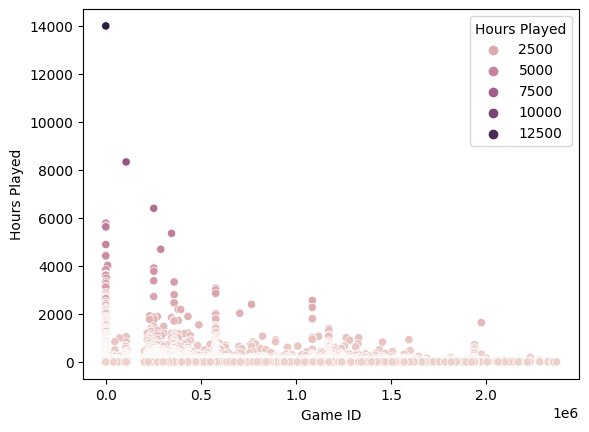

In [ ]:
# Create the scatter plot using seaborn
fig, ax = plt.subplots()
sns.scatterplot(data=df, x='Game ID', y='Hours Played', hue='Hours Played')